In [1]:
import gng_py
import numpy as np
import pandas as pd

In [2]:
input_file = "/tmp/circles.csv"                         

In [3]:
in_set = pd.read_csv(input_file)
in_set = in_set.to_numpy().flatten()

In [4]:
ctx = gng_py.PyContext()
ctx = gng_py.PyContext()
ctx.load_config("input.json")
ctx.init_dataset_vec(in_set)
ctx.fit()
model_string = ctx.get_model_string()


In [ ]:
import sys,os
import matplotlib.pyplot as plt
import json

In [6]:
data = json.loads(model_string)

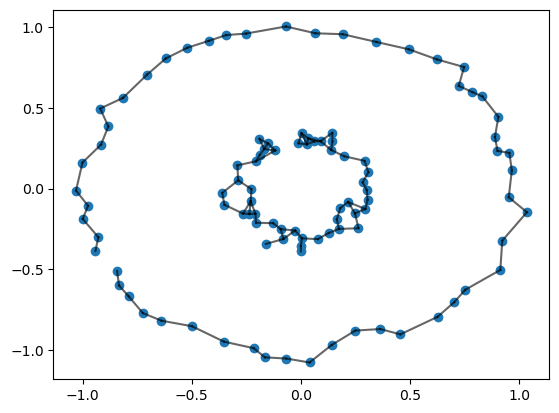

In [7]:
points = None
edges = None
edge_positions = None
rows = []
for neuron in data["model"]["neurons"]:
    position = neuron["position"]
    id = neuron['id']
    x = position[0]
    y = position[1]
    rows.append({"id": id, "x": x, "y": y})

points = pd.DataFrame(rows)

# Extract edges
row_edge = []
for edge in data['model']['edges']:
    edge_from = edge['from']
    edge_to = edge['to']
    row_edge.append({"start": edge_from, "to": edge_to})

edges = pd.DataFrame(row_edge)

# Calculate edge positions
row = []
for _, row_edge in edges.iterrows():
    try:
        row_from = points.loc[points['id'] == row_edge['start']].iloc[0]
        x_from = float(row_from['x'])
        y_from = float(row_from['y'])
        row_to = points.loc[points['id'] == row_edge['to']].iloc[0]
        x_to = float(row_to['x'])
        y_to = float(row_to['y'])

        row.append({"x_from": x_from, "y_from": y_from, "x_to": x_to, "y_to": y_to})
    except (IndexError, KeyError):
        continue

edge_positions = pd.DataFrame(row)
import matplotlib.pyplot as plt
plot = plt.figure()
ax = plot.add_subplot(111)

ax.clear()

# Plot points
ax.scatter(points['x'], points['y'])

# Plot connections
for _, row in edges.iterrows():
    row_from = points.loc[points['id'] == row['start']].iloc[0]
    x_from = float(row_from['x'])
    y_from = float(row_from['y'])
    row_to = points.loc[points['id'] == row['to']].iloc[0]
    x_to = float(row_to['x'])
    y_to = float(row_to['y'])

    ax.plot([x_from, x_to], [y_from, y_to], 'k-', alpha=0.6)
